## MACHINE LEARNING REGRESSION

### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### LOADING THE DATASET

In [3]:
df = pd.read_csv("USA_Housing - USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


### Dropping the Address Column from the dataset

In [5]:
df.drop(columns = ['Address'], inplace=True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.4 KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [8]:
df.shape

(5000, 6)

### Comparing "Avg. Area House Age" and "Area Population" using Jointplot

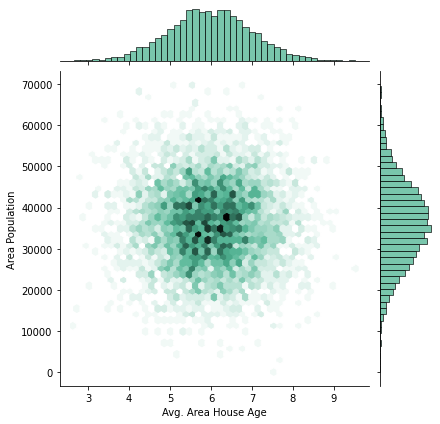

In [9]:
import seaborn as sns
sns.jointplot(x="Avg. Area House Age", y="Area Population", data=df, kind="hex", color="#4CB391")

### Linear Model plot of "Avg. Area Income" and "Price" Using Seaborn’s Lmplot)

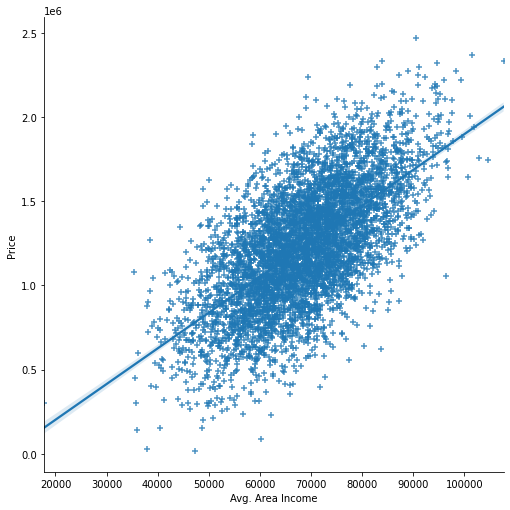

In [10]:
sns.lmplot(x='Avg. Area Income', y='Price', data=df, markers="+",  palette="bright", height = 7)

### Visualizing with "Pairplot" and "Heatmap" to show the most correlated features with "Price" Feature

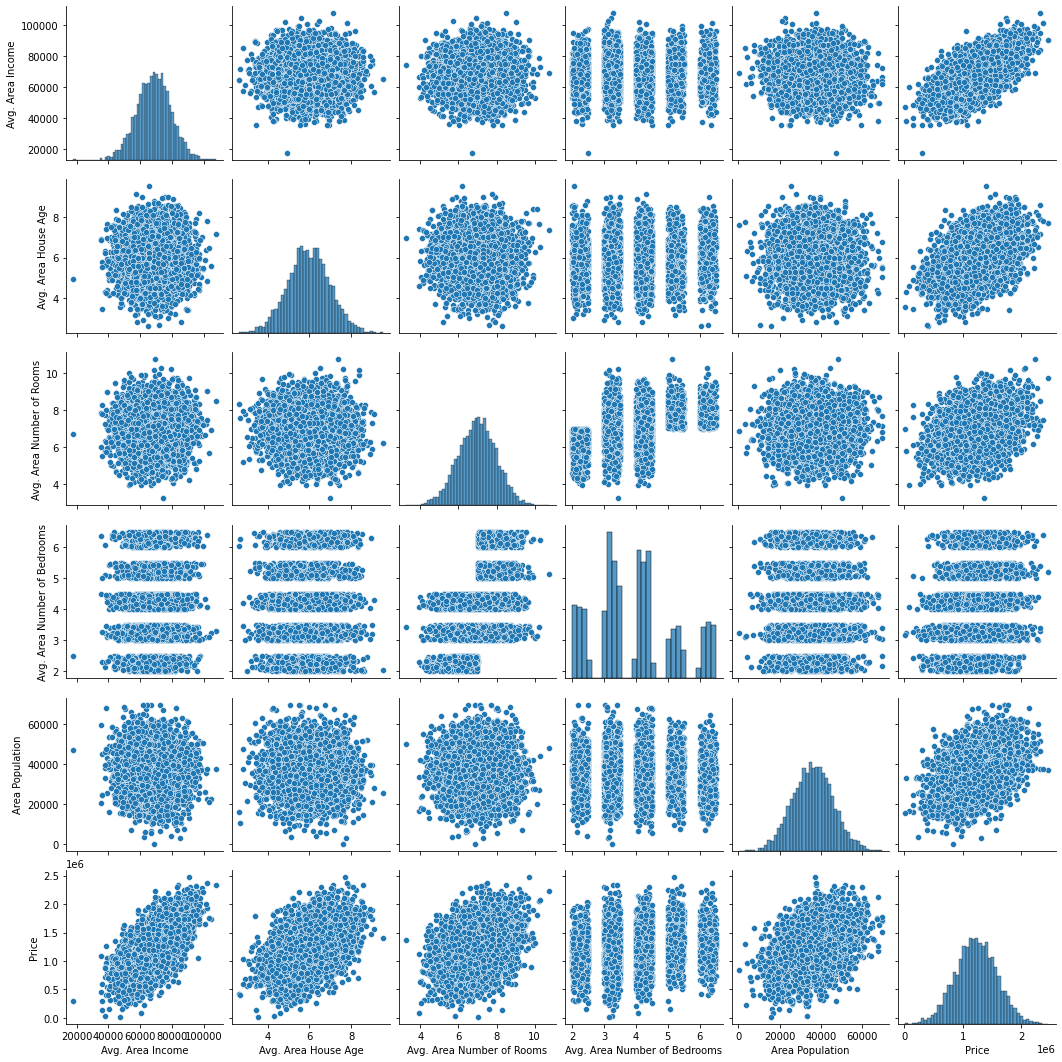

In [11]:
sns.pairplot(df, diag_kind='hist')

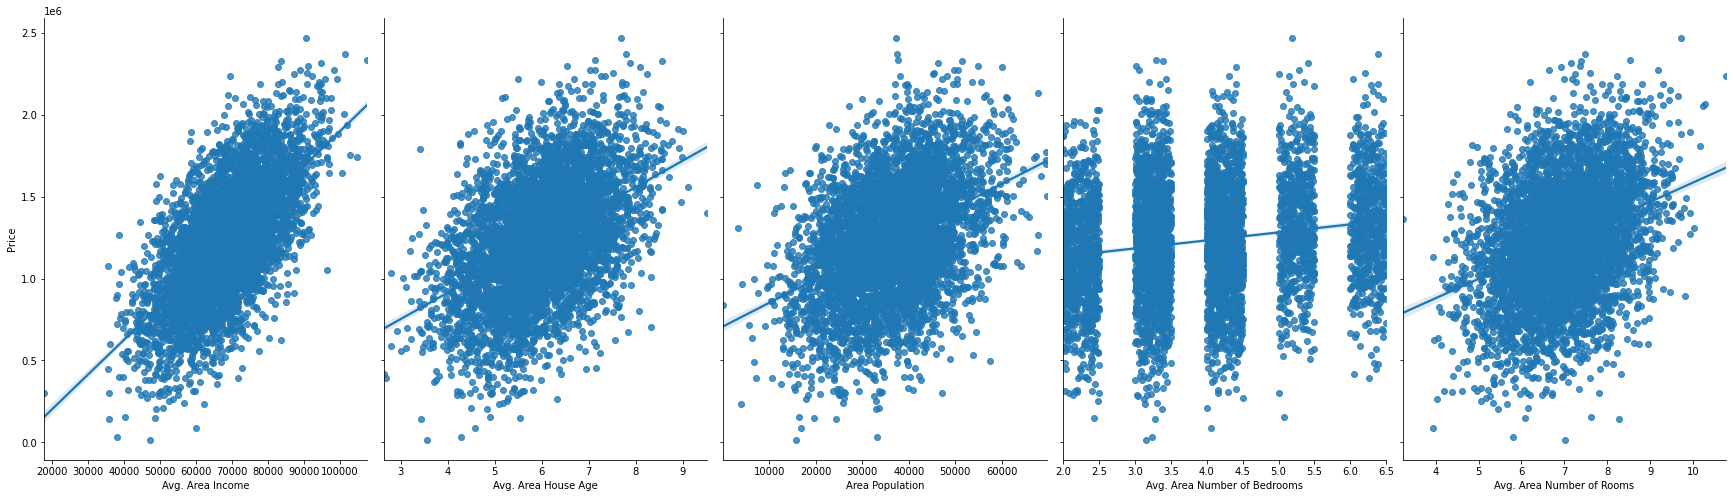

In [12]:
sns.pairplot(df, x_vars=['Avg. Area Income','Avg. Area House Age','Area Population', 'Avg. Area Number of Bedrooms', 'Avg. Area Number of Rooms'], y_vars='Price', height=7, aspect=0.7, kind='reg')

<AxesSubplot:>

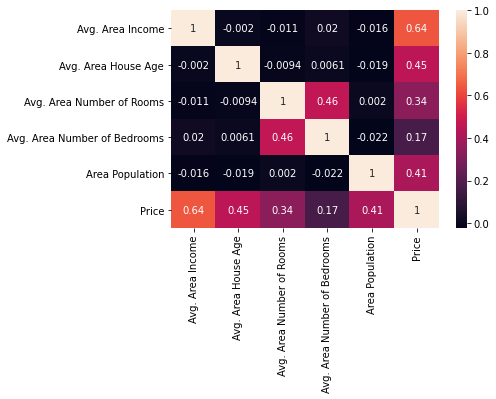

In [13]:
sns.heatmap(df.corr(),annot=True)

### APPLYING MINMAXSCALER to Scale the Dataset

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [16]:
new_scaled = pd.DataFrame(data= scaled, columns=df.columns)
new_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


#### Naming the Independent Variable as "X" and Dependent Variable as "y"

In [17]:
X = new_scaled.iloc[:, :5].values
X

array([[0.68682217, 0.44198584, 0.50150158, 0.46444444, 0.3299422 ],
       [0.68352073, 0.48853836, 0.46450137, 0.24222222, 0.57596801],
       [0.48373705, 0.46860901, 0.70135011, 0.69555556, 0.52858204],
       ...,
       [0.50713527, 0.67002636, 0.20853446, 0.02888889, 0.47651494],
       [0.55841872, 0.4203891 , 0.51757886, 0.76444444, 0.61128233],
       [0.53071451, 0.48699729, 0.47267788, 0.46      , 0.66708815]])

In [18]:
y = new_scaled.iloc[:, -1:].values
y

array([[0.42521032],
       [0.60736859],
       [0.42519175],
       ...,
       [0.41367241],
       [0.48212679],
       [0.52301078]])

### SPLITTING THE DATASET INTO TRAINING AND TESTING DATASET

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [20]:
X_train

array([[0.55941808, 0.39563482, 0.56713255, 0.24444444, 0.6390978 ],
       [0.64438083, 0.42711079, 0.5857435 , 0.49111111, 0.42942827],
       [0.59049797, 0.5402996 , 0.53354196, 0.76      , 0.55371041],
       ...,
       [0.4207243 , 0.15878864, 0.48277368, 0.06666667, 0.90731197],
       [0.50328424, 0.47869973, 0.35585794, 0.46666667, 0.46872699],
       [0.63714016, 0.7273646 , 0.69177979, 0.51777778, 0.80599801]])

In [21]:
X_test

array([[0.54477839, 0.44697245, 0.60597924, 0.51555556, 0.52724036],
       [0.49371949, 0.33185822, 0.55712819, 0.93777778, 0.3720091 ],
       [0.62117072, 0.59966234, 0.67800398, 0.29777778, 0.6188637 ],
       ...,
       [0.34413273, 0.42174787, 0.3795776 , 0.09555556, 0.28092136],
       [0.52594284, 0.40572416, 0.79436543, 0.69777778, 0.53883897],
       [0.53582129, 0.6809918 , 0.63598574, 0.46444444, 0.88698261]])

### Training the Model

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
## Coefficient value  for the Trained Model

reg.coef_

array([[0.78899388, 0.46207838, 0.37528748, 0.00409767, 0.42891505]])

In [24]:
## Intercept value  for the Trained Model

reg.intercept_

array([-0.58450893])

### Testing the Model

In [25]:
y_pred = reg.predict(X_test)
y_pred

array([[0.50752451],
       [0.33086347],
       [0.70378852],
       ...,
       [0.14522394],
       [0.55002392],
       [0.77394319]])

In [26]:
y_pred = reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0.51 0.5 ]
 [0.33 0.35]
 [0.7  0.69]
 ...
 [0.15 0.06]
 [0.55 0.54]
 [0.77 0.77]]


### Visualizing the Model Prediction

Text(0.5, 1.0, 'Output of the Model Prediction')

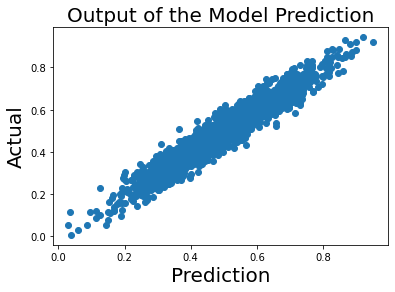

In [27]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction", fontsize= 20)
plt.ylabel("Actual", fontsize= 20)
plt.title("Output of the Model Prediction", fontsize= 20)

c:\users\user\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

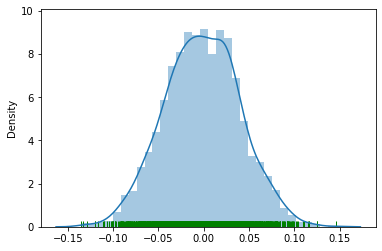

In [28]:
sns.distplot(y_test-y_pred, rug=True, rug_kws={"color": "g"})

### MODEL PERFORMANCE USING SOME METRICS

In [29]:
## CALCULATING THE MEAN SQUARED ERROR

from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.04169324779391165


In [30]:
## ## CALCULATING THE MEAN ABSOLUTE ERROR

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.033544217095716755

In [32]:
## CALCULATING THE METRICS USING RSQUARED SCORE

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

0.9176824009781773